In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/ht-oliver/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

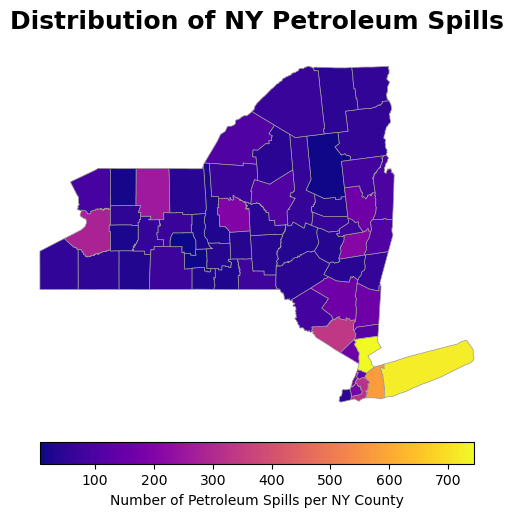

In [ ]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

### DATA LOADING
    # Define file path for 'spills' data and load data
fp = os.path.join("data", "Spill_Incidents_20251108.csv")
spills = pd.read_csv(fp)
    # Define file path for 'counties' data and load data
fp1 = os.path.join("data", "tl_2023_us_county", "tl_2023_us_county.shp")
counties = gpd.read_file(fp1)

### DATA CLEANING
    # Change column names of both data frames to lowercase and replace `" "`` with `"_"`
spills.columns = spills.columns.str.lower().str.replace(" ", "_")
counties.columns = counties.columns.str.lower().str.replace(" ", "_")

### DATA AGGREGATION
## We want to create a map that visualizes petroleum spills per county in NY from January 1st to October 31st, 2023
    # Change date column to datetime for 'spill_date'
spills['spill_date'] = pd.to_datetime(spills['spill_date'])
    # Create a new data frame with petroleum spills between 01/01/2023 and 10/31/2023
petr_23 = spills[(spills['spill_date'] >= '01-01-2023') &
                 (spills['spill_date'] <= '10-31-2023') &
                 (spills['material_family'] == "Petroleum")]
    # Create new dataframe with spills per county, reset index
spills_per_county = petr_23.groupby("county").size().reset_index(name = "n_spills")
    # Create new data frame with data for NY Counties only (NY State FIPS ID = 36)
ny_counties = counties[counties['statefp'] == '36']
    # Prepare data for merge, eliminate uncommon counties between spills and counties
spills_per_county['county'] = spills_per_county['county'].replace('St Lawrence', 'St. Lawrence')
spills_per_county = spills_per_county[
    ~spills_per_county['county'].isin(['New Jersey - Region 2', 'Tuscarora Indian Reservation'])
]
    # Overwrite ny data frame with an inner join of county and spill data
ny_counties = pd.merge(spills_per_county, ny_counties, how = 'inner', left_on = 'county', right_on = 'name')
ny_counties = ny_counties.drop(columns='name')
    # Account for loss of 1 spill in Tuscarora Indian Reservation
ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'] += 1  

### CREATE MAP
    # Re-specify ny_counties as a gpd geo-dataframe, it is currently just a pandas dataframe
ny_counties = gpd.GeoDataFrame(ny_counties, geometry='geometry', crs="EPSG:4326")
    # Create map
fig, ax = plt.subplots(figsize=(8, 6)) # Define plot
ny_counties.plot(               # Plot
    ax=ax,
    column='n_spills',          # variable to color by
    cmap='plasma',             
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Petroleum Spills per NY County, 2023",
        "orientation": "horizontal",
        "pad": 0.05
    }
)

ax.set_title('Distribution of NY Petroleum Spills', fontsize=18, weight='bold', pad=15)
ax.set_axis_off() # Remove axis
plt.show()




## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your commit history if you try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

Spills:
This data contains record of the time, place, amount, and material of chemical, petroleum and otherwise polluting spills in New York dating back to 1900. Dataset is provided by the New York State Department of Environmental Conservation, and was last updated on the day that it was accessed: November 8, 2025. Data was downloaded from the following link: [https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk/about_data]

Counties:
The 2023 Counties and Equivalent TIGER/Line Shapefiles contain the geographic extent of counties and equivalent political boundaries for all US States and Territories. Data was accessed November 8, 2025 from the following link: [https://www.census.gov/cgi-bin/geo/shapefiles/index.php]

## 3. Import libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [3]:
# Define file path for spill data and load data
fp = os.path.join("data", "Spill_Incidents_20251108.csv")
spills = pd.read_csv(fp)


# Define file path for county data and load data
fp1 = os.path.join("data", "tl_2023_us_county", "tl_2023_us_county.shp")
counties = gpd.read_file(fp1)

<!-- BEGIN QUESTION -->

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head

b. Check the data types of the columns

c. Check the unique values in the `material_family` column

d. Check the unique values in the `county` column

e. Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells for preliminary data exploration.

In [4]:
#a. Check the dataframe's head
spills.head()

#a2. change column names to lowercase and replace `" "`` with `"_"`
spills.columns = spills.columns.str.lower().str.replace(" ", "_")

In [5]:
#b. Check the data types of the columns
spills.dtypes

spill_number              int64
program_facility_name    object
street_1                 object
street_2                 object
locality                 object
county                   object
zip_code                 object
swis_code                 int64
dec_region                int64
spill_date               object
received_date            object
contributing_factor      object
waterbody                object
source                   object
close_date               object
material_name            object
material_family          object
quantity                 object
units                    object
recovered                object
dtype: object

In [6]:
#c. Check the unique values in the `material_family` column
spills.material_family.unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [7]:
#d. Check the unique values in the `county` column
spills.county.unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Oneida', 'Wayne', 'Suffolk',
       'Orleans', 'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison',
       'Chemung', 'Seneca', 'Broome', 'Hamilton', 'Washington', 'Steuben',
       'Rensselaer', 'Franklin', 'Columbia', 'Fulton', 'Herkimer',
       'Schoharie', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Tioga', 'Chautauqua', 'Cattaraugus',
       'Wyoming', 'Yates', 'Greene', 'Pennsylvania - Region 9',
       'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

e. I was able to find out the number of columns, roughly what kind of information goes in each column, and the column names from the `.head()` command. I was able to find out the column data types with the `.dtypes` command, and took note that both 'date' columns and the 'quantity' column are objects. The date columns may need to be changed to 'datetime' data type, and the quanity to floats. The `.unique` command showed me that I'm only dealing with 4 catergories of materials, and that likely every county in New York is represented in the dataset.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.B. Cleaning
a. Simplify column names as needed.

In [ ]:
# Change column names to lowercase and replace `" "`` with `"_"`
# THIS LINE IS COMMENTED OUT BECAUSE IT WAS ALREADY PERFORMED IN THE CODE CHUNK 5a
### spills.columns = spills.columns.str.lower().str.replace(" ", "_")


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Update column data types as needed *for this analysis*.

In [8]:
# Change date columns to datetime for 'spill_date'
spills['spill_date'] = pd.to_datetime(spills['spill_date'])

# Check to make sure it worked
spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date                    object
contributing_factor              object
waterbody                        object
source                           object
close_date                       object
material_name                    object
material_family                  object
quantity                         object
units                            object
recovered                        object
dtype: object

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [9]:
# Create a new data frame with petroleum spills between 01/01/2023 and 10/31/2023
petr_23 = spills[(spills['spill_date'] >= '01-01-2023') &
                 (spills['spill_date'] <= '10-31-2023') &
                 (spills['material_family'] == "Petroleum")]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print a message verifying that `petr_23` only has data for 2023 and from January through October.
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`.

In [10]:
# Verify that new data frame only has data from January - October of 2023
print(f"petr_2023 contains data for the months of {petr_23.spill_date.dt.month_name().unique()} in the year {petr_23.spill_date.dt.year.unique()}" )

petr_2023 contains data for the months of ['June' 'August' 'September' 'July' 'January' 'February' 'March' 'October'
 'May' 'April'] in the year [2023]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [11]:
# Check if petr_23 has any values in 'material_family' that are not "Petroleum"
assert (petr_23['material_family'] == 'Petroleum').all(), "Warning: Non-petroleum spills found in petr_23"


<!-- END QUESTION -->

### 5.D. Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Two columns only.
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.

In [12]:
# Create new dataframe with spills per county, reset index
spills_per_county = petr_23.groupby("county").size().reset_index(name = "n_spills")
# View to confirm
spills_per_county.head()

,county,n_spills
0,Albany,206
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47


In [13]:
grader.check("q5d")

q5d results: All test cases passed!

<!-- BEGIN QUESTION -->

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head

b. Check the data types of the columns

c. Check the geo-dataframe's CRS

d. Plot the geo-dataframe

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells of preliminary data exploration.

During exploration the `head()` method told me that all of my column names are upper-case, which I will want to change. The `.dtypes` attribute told me that other than my 'ALAND', 'AWATER' and 'GEOMETRY' columns, all columns are 'object'. Checking the crs with the `.crs` attribute told me that this dataset is projected using a crs designed specifically for North America. Plotting the data with the `.plot()` method showed me the extent of the counties data, which appears to be the Continental US and all offshore states and territories.

In [14]:
# a
# Check geo-dataframes first 5 columns
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [15]:
# b
# Check data types of 'counties' geo_df
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [16]:
# c
# Check the CRS of 'counties' geo_df
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

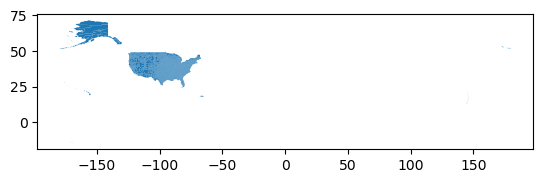

In [17]:
# d
# Plot 'counties' geo_df
counties.plot()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [18]:
# Make columns lower-case, replace " " with "_"
counties.columns = counties.columns.str.lower().str.replace(" ", "_")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them (you may need to look at the metadata).

<Axes: >

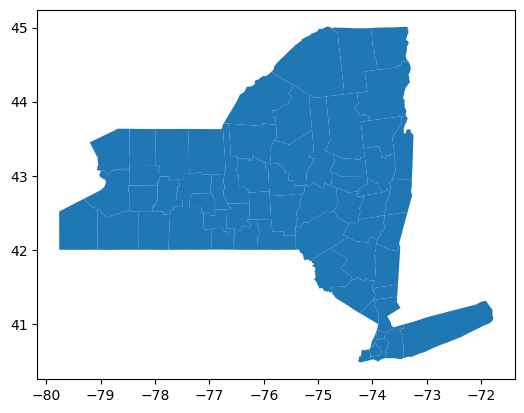

In [19]:
# Create new data frame with data for NY Counties only (NY State FIPS ID = 36)
ny_counties = counties[counties['statefp'] == '36']
# Plot NT counties
ny_counties.plot()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.


In [20]:
# Print unique values in the 'name' column of NY Counties
print(ny_counties['name'].unique())

['Steuben' 'Saratoga' 'Allegany' 'Oswego' 'Ulster' 'St. Lawrence'
 'Schuyler' 'Essex' 'Suffolk' 'Hamilton' 'Dutchess' 'Otsego' 'Tompkins'
 'Albany' 'Cayuga' 'Greene' 'Herkimer' 'Warren' 'Jefferson' 'Clinton'
 'Nassau' 'Madison' 'Washington' 'Westchester' 'Lewis' 'Ontario'
 'Cortland' 'Richmond' 'Erie' 'Putnam' 'Montgomery' 'Sullivan' 'Orleans'
 'Oneida' 'Cattaraugus' 'Yates' 'Tioga' 'Monroe' 'Schoharie' 'Broome'
 'Rensselaer' 'Seneca' 'Queens' 'Genesee' 'Wayne' 'Niagara' 'Kings'
 'Chemung' 'Wyoming' 'New York' 'Columbia' 'Chautauqua' 'Franklin'
 'Onondaga' 'Chenango' 'Fulton' 'Rockland' 'Livingston' 'Delaware'
 'Orange' 'Schenectady' 'Bronx']


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.

In [21]:
# Print unique county names in 'spills_per_county'
print(spills_per_county['county'].unique())

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']


<!-- END QUESTION -->



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 


In [44]:
# Create a list of strings with all counties from 'spills_per_county' that are not contained in 'ny_counties'
diff_names_spills = np.setdiff1d(spills_per_county['county'].unique(),
                                 ny_counties['name'].unique()).tolist()
diff_names_spills


[]

In [23]:
grader.check("7Ac")

7Ac results: All test cases passed!

d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [43]:
# Create a list of strings with all counties from 'ny_counties' that are not contained in 'spills_per_county'
diff_names_ny = np.setdiff1d(ny_counties['name'].unique(),
                             spills_per_county['county'].unique()).tolist()
diff_names_ny

[]

In [25]:
grader.check("7Ad")

7Ad results: All test cases passed!

e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [ ]:
# e. 
spills_per_county[spills_per_county['county'] == 'Tuscarora Indian Reservation']

# ANSWER: 1


,county,n_spills
56,Tuscarora Indian Reservation,1


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and Verify the update was successful.


In [46]:
# Replace 'St Lawrence' with 'St. Lawrence' in spills_per_county df
spills_per_county['county'] = spills_per_county['county'].replace('St Lawrence', 'St. Lawrence')

# Verify
spills_per_county['county'].unique()


array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New York', 'Niagara', 'Oneida', 'Onondaga', 'Ontario',
       'Orange', 'Orleans', 'Oswego', 'Otsego', 'Putnam', 'Queens',
       'Rensselaer', 'Richmond', 'Rockland', 'Saratoga', 'Schenectady',
       'Schoharie', 'Schuyler', 'Seneca', 'St. Lawrence', 'Steuben',
       'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 


In [ ]:
# Remove 'New Jersey Region 2' and 'Tuscarora Indian Reservation' from spills data
spills_per_county = spills_per_county[
    ~spills_per_county['county'].isin(['New Jersey - Region 2', 'Tuscarora Indian Reservation'])
]

# Verify
print(diff_names_ny)
print(diff_names_spills)

[]
['Abbeville' 'Acadia' 'Accomack' ... 'Zapata' 'Zavala' 'Ziebach']


b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [51]:
# Overwrite ny data frame with an inner join of county and spill data
ny_counties = pd.merge(spills_per_county, ny_counties, how = 'inner', left_on = 'county', right_on = 'name')


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [ ]:
# Add 1 spill to Niagara county
ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'] += 1

# Verify
ny_counties[ny_counties['county'] == 'Niagara']


,county,n_spills,statefp,countyfp,countyns,geoid,geoidfq,name,namelsad,lsad,...,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
31,Niagara,89,36,063,00974130,36063,0500000US36063,Niagara,Niagara County,06,...,G4020,160,15380,None,A,1352876140,1598772310,+43.2726719,-078.8129431,"POLYGON ((-78.49165 43.08396, -78.49179 43.084..."


## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation) and date of access



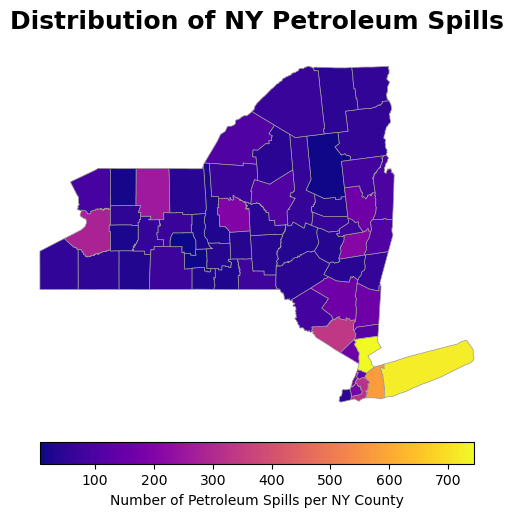

In [ ]:
# Re-specify ny_counties as a gpd geo-dataframe
ny_counties = gpd.GeoDataFrame(ny_counties, geometry='geometry', crs="EPSG:4326")

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Create map
ny_counties.plot(
    ax=ax,
    column='n_spills',          # variable to color by
    cmap='plasma',             
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Petroleum Spills per NY County, 2023",
        "orientation": "horizontal",
        "pad": 0.05
    }
)

ax.set_title('Distribution of NY Petroleum Spills', fontsize=18, weight='bold', pad=15)
ax.set_axis_off() # Remove axis
plt.show()





b. Write a description of how the map was created, including key takeaways. If you need to do additional data analysis to include relevant information from the data, you may include additional cells here.

This map was created by combining data on oil spills in New York with the spatial data with the shape of New York counties. In order for these datasets to be combined, both had to be manipulated. The first step was 

## Complete workflow

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the choropleth map of the number of petroleum spills per county in the state of New York in 2023. The only ouput of this cell should be the choropleth map  you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.

##### Run the cell below to run all autograder tests. 

In [74]:
grader.check_all()

7Ac results:
    7Ac - 1 result:
        ❌ Test case failed
        Trying:
            assert len(diff_names_spills) == 3
        Expecting nothing
        **********************************************************************
        Line 1, in 7Ac 0
        Failed example:
            assert len(diff_names_spills) == 3
        Exception raised:
            Traceback (most recent call last):
              File "/Users/henryoliver/opt/anaconda3/envs/eds220-env/lib/python3.11/doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest 7Ac 0[0]>", line 1, in <module>
                assert len(diff_names_spills) == 3
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError

    7Ac - 2 result:
        ✅ Test case passed

7Ad results:
    7Ad - 1 result:
        ❌ Test case failed
        Trying:
            assert len(diff_names_ny) == 1
        Expecting nothing
        *****************************